<h2><b>Input : </b></h2>

*   train_microarray.csv
*   test_microarray.csv
*   suspect.csv
* ab1_features.pkl
* ab2_features.pkl
* ab3_features.pkl
* ab1_model.pkl
* ab2_model.pkl
* ab3_model.pkl

<h2><b>Output : </b></h2>

*   test_microarray_prediksi_ab.csv
*   suspect_prediksi_ab.csv

# Run All

## Import dan Load

Import library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

import joblib

Load data

In [ ]:
df_train = pd.read_csv('https://drive.google.com/uc?id=1MiU_0V6-LvZ_CyCuWf2HoW-WXNKSIFJQ')
df_test = pd.read_csv('https://drive.google.com/uc?id=1G-TSwysKHqTcXl0GERkf3cXKUtBrJ1Yc')
df_suspect = pd.read_csv('https://drive.google.com/uc?id=1r8oGfgJ3RTxRZSlU7pcYkBbq2ATOoRVP')

Load hasil seleksi fitur

In [ ]:
ab1_features = joblib.load('ab1_features.pkl')
ab2_features = joblib.load('ab2_features.pkl')
ab3_features = joblib.load('ab3_features.pkl')

Load hyperparameter tuning

In [ ]:
ab1_model = joblib.load('ab1_model.pkl')
ab2_model = joblib.load('ab2_model.pkl')
ab3_model = joblib.load('ab3_model.pkl')

Mengambil fitur dari df_train awal

In [ ]:
df_train1 = df_train[ab1_features]
df_train2 = df_train[ab2_features]
df_train3 = df_train[ab3_features]

Mengambil fitur dari df_test awal

In [ ]:
df_test1 = df_test[ab1_features]
df_test2 = df_test[ab2_features]
df_test3 = df_test[ab3_features]

Mengambil fitur dari df_suspect

In [ ]:
df_suspect1 = df_suspect[ab1_features[:-1]]
df_suspect2 = df_suspect[ab2_features[:-1]]
df_suspect3 = df_suspect[ab3_features[:-1]]

### Contoh Data Train

In [ ]:
df_train1.head()

,211612_s_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,202936_s_at,216609_at,207953_at,217679_x_at,210168_at,...,204919_at,202436_s_at,202437_s_at,209457_at,206584_at,217022_s_at,206835_at,202435_s_at,205749_at,Label
0,2.535743,2.052387,2.873506,2.285882,2.518572,2.656989,1.982433,2.324655,2.431334,2.458624,...,2.723190,2.481315,1.911761,2.790067,2.594274,3.326183,2.172511,1.817986,2.344495,1
1,2.587822,1.957657,2.779933,2.248177,2.508590,2.366057,2.139794,2.280555,2.374257,2.461287,...,2.761961,3.235303,3.104195,2.511882,2.270037,2.215997,2.492978,2.619466,2.850630,1
2,2.529666,2.059190,2.805088,2.255567,2.658405,2.542071,2.113104,2.323435,2.513285,2.488348,...,2.794787,3.018061,2.694711,2.600055,2.286755,2.428886,2.180694,2.300764,2.624524,0
3,2.274739,2.273920,2.952965,2.554384,2.736684,2.465318,2.204011,2.573738,2.646684,2.458046,...,2.436898,2.478467,1.743530,2.305844,1.810791,3.321267,2.043120,1.905358,2.407280,0
4,2.551101,2.321532,2.887101,2.752609,2.752873,2.608392,2.483343,2.565807,2.924184,2.526407,...,2.601354,2.681277,2.099440,2.453478,2.682590,3.044343,2.009510,1.929459,2.500476,0


In [ ]:
df_train1.shape

(130, 101)

### Contoh Data Test

In [ ]:
df_test1.head()

,211612_s_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,202936_s_at,216609_at,207953_at,217679_x_at,210168_at,...,204919_at,202436_s_at,202437_s_at,209457_at,206584_at,217022_s_at,206835_at,202435_s_at,205749_at,Label
0,2.522052,2.503071,2.833083,2.905310,2.861828,2.513210,1.864313,2.747823,2.956634,2.404330,...,2.546919,2.607032,1.901940,2.742895,1.850130,2.711916,2.090198,2.100430,2.481651,0
1,2.529361,2.043689,2.729539,2.276008,2.508054,2.776756,1.974100,2.348572,2.367388,2.955563,...,2.612417,2.438313,1.672712,3.012799,2.023244,3.094587,1.931578,1.795092,2.285975,1
2,2.383285,2.557625,2.992440,2.949728,2.925960,2.637554,2.126646,2.739890,3.010178,2.614746,...,2.518581,2.493968,1.826291,2.621983,1.706684,2.565371,1.880459,1.853020,2.467939,1
3,2.642286,2.047078,2.834506,2.434371,2.548282,2.529123,2.054124,2.260270,2.516614,2.458760,...,2.588969,2.456515,1.862865,2.623923,1.939054,2.570787,2.055436,1.730806,2.274817,1
4,2.406230,2.275517,3.065341,2.827774,2.847275,2.353981,2.104720,2.664395,2.946265,2.519038,...,2.548820,2.876919,2.713711,2.736259,2.197337,2.706017,1.962940,2.250387,2.292197,0


In [ ]:
df_test1.shape

(57, 101)

### Suspect

In [ ]:
df_suspect1

,211612_s_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,202936_s_at,216609_at,207953_at,217679_x_at,210168_at,...,211506_s_at,204919_at,202436_s_at,202437_s_at,209457_at,206584_at,217022_s_at,206835_at,202435_s_at,205749_at
0,2.256059,2.559232,2.904486,2.924660,2.958922,2.558358,1.645253,2.650864,2.997475,2.456140,...,1.975129,2.552534,2.601120,2.001077,2.579224,2.032561,3.042804,2.210259,1.975153,2.530297
1,2.476502,2.484916,2.435804,2.751464,2.922157,2.513460,1.737874,2.718411,2.893192,2.666058,...,2.067233,2.606267,2.631799,2.074114,2.592667,1.902926,2.446501,2.350769,2.147601,2.639203
2,2.516803,2.352785,2.557198,2.925518,3.073885,2.543978,2.022472,2.774471,3.149213,2.749327,...,2.121054,2.605409,2.584824,1.936278,2.568440,1.958284,2.244948,2.293260,2.111180,2.626987
3,2.499117,2.559049,2.656475,2.763619,2.878468,2.592949,1.811895,2.649418,2.847074,2.590253,...,1.927978,2.618020,2.512463,1.829970,2.625267,1.971494,2.902077,2.311065,2.034676,2.572015
4,2.411571,2.453675,2.912560,2.780565,2.861779,2.491120,2.357249,2.690230,2.971505,2.549438,...,2.031565,2.739638,2.956099,2.816007,2.442840,1.979739,2.802077,2.326602,2.101394,2.770397


In [ ]:
df_suspect1.shape

(5, 100)

## X_train, y_train, X_test, y_test

X_train

In [ ]:
X_train1 = df_train1.iloc[:,:-1]
X_train2 = df_train2.iloc[:,:-1]
X_train3 = df_train3.iloc[:,:-1]

y_train

In [ ]:
y_train1 = df_train1.iloc[:,-1]
y_train2 = df_train2.iloc[:,-1]
y_train3 = df_train3.iloc[:,-1]

X_test

In [ ]:
X_test1 = df_test1.iloc[:,:-1]
X_test2 = df_test2.iloc[:,:-1]
X_test3 = df_test3.iloc[:,:-1]

y_test

In [ ]:
y_test1 = df_test1.iloc[:,-1]
y_test2 = df_test2.iloc[:,-1]
y_test3 = df_test3.iloc[:,-1]

## Validasi

### AB1

Fit model

In [ ]:
ab1_model.fit(X_train1, y_train1)

AdaBoostClassifier(learning_rate=1, n_estimators=150)

Hasil prediksi dengan data train

In [ ]:
ab1_val = ab1_model.predict(X_train1)
print("Accuracy : ", metrics.accuracy_score(y_train1, ab1_val))
print("Precision: ", metrics.precision_score(y_train1, ab1_val))
print("Recall   : ", metrics.recall_score(y_train1, ab1_val))
print("F1 Score : ", metrics.f1_score(y_train1, ab1_val))

Accuracy :  1.0
Precision:  1.0
Recall   :  1.0
F1 Score :  1.0


Visualisasi confusion matrix

[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

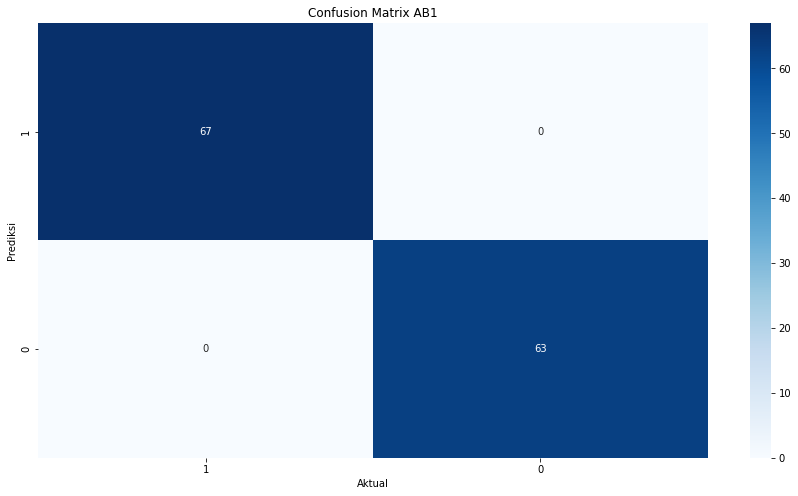

In [ ]:
cf_matrix = metrics.confusion_matrix(y_train1, ab1_val, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix AB1') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

Hasil prediksi dengan data test

In [ ]:
ab1_prediksi = ab1_model.predict(X_test1)
print("Accuracy : ", metrics.accuracy_score(y_test1, ab1_prediksi))
print("Precision: ", metrics.precision_score(y_test1, ab1_prediksi))
print("Recall   : ", metrics.recall_score(y_test1, ab1_prediksi))
print("F1 Score : ", metrics.f1_score(y_test1, ab1_prediksi))

Accuracy :  0.7368421052631579
Precision:  0.7272727272727273
Recall   :  0.8
F1 Score :  0.761904761904762


Visualisasi confusion matrix

[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

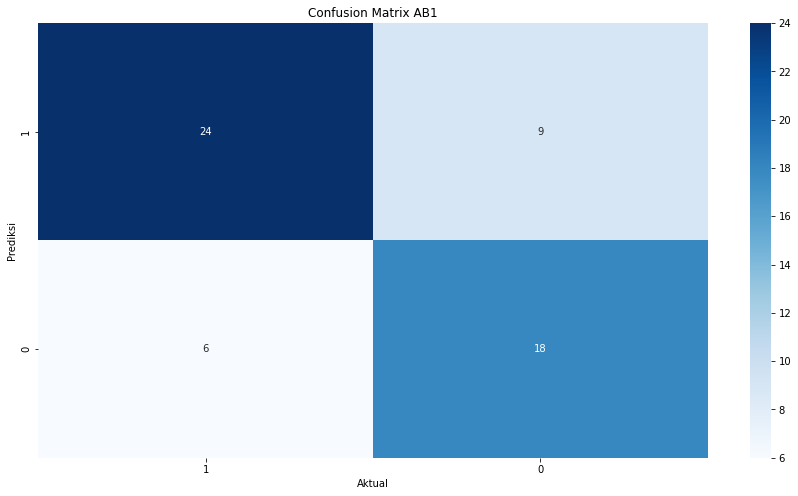

In [ ]:
cf_matrix = metrics.confusion_matrix(y_test1, ab1_prediksi, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix AB1') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

### AB2

Fit model

In [ ]:
ab2_model.fit(X_train2, y_train2)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200)

Hasil prediksi dengan data train

In [ ]:
ab2_val = ab2_model.predict(X_train2)
print("Accuracy : ", metrics.accuracy_score(y_train2, ab2_val))
print("Precision: ", metrics.precision_score(y_train2, ab2_val))
print("Recall   : ", metrics.recall_score(y_train2, ab2_val))
print("F1 Score : ", metrics.f1_score(y_train2, ab2_val))

Accuracy :  1.0
Precision:  1.0
Recall   :  1.0
F1 Score :  1.0


Visualisasi confusion matrix

[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

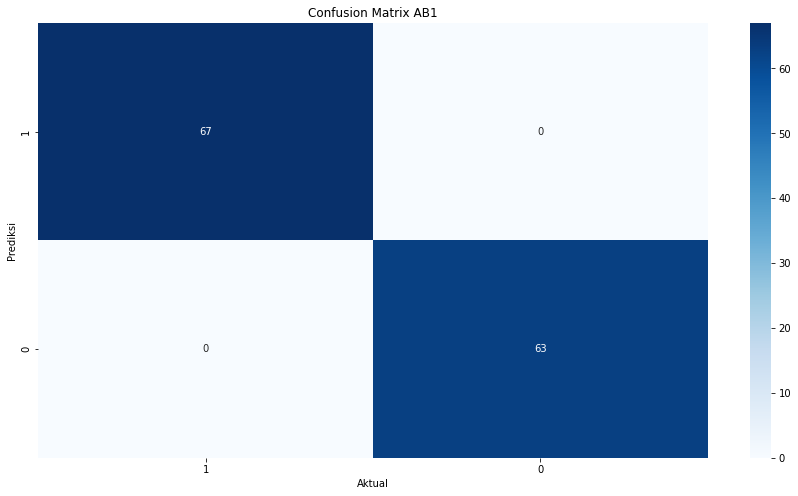

In [ ]:
cf_matrix = metrics.confusion_matrix(y_train2, ab2_val, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix AB1') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

Hasil prediksi dengan data test

In [ ]:
ab2_prediksi = ab2_model.predict(X_test2)
print("Accuracy : ", metrics.accuracy_score(y_test2, ab2_prediksi))
print("Precision: ", metrics.precision_score(y_test2, ab2_prediksi))
print("Recall   : ", metrics.recall_score(y_test2, ab2_prediksi))
print("F1 Score : ", metrics.f1_score(y_test2, ab2_prediksi))

Accuracy :  0.7368421052631579
Precision:  0.7419354838709677
Recall   :  0.7666666666666667
F1 Score :  0.7540983606557377


Visualisasi Confusion Matrix

[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

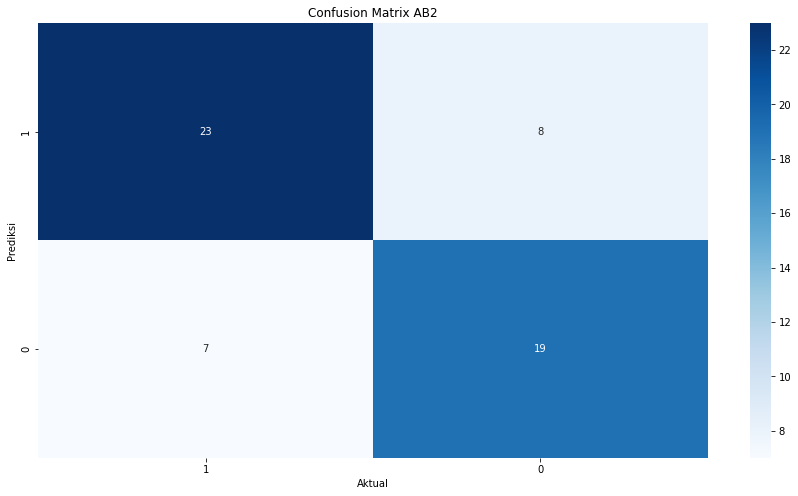

In [ ]:
cf_matrix = metrics.confusion_matrix(y_test2, ab2_prediksi, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix AB2') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

### AB3

Fit model

In [ ]:
ab3_model.fit(X_train3, y_train3)

AdaBoostClassifier(learning_rate=0.01)

Hasil prediksi dengan data train

In [ ]:
ab3_val = ab3_model.predict(X_train3)
print("Accuracy : ", metrics.accuracy_score(y_train3, ab3_val))
print("Precision: ", metrics.precision_score(y_train3, ab3_val))
print("Recall   : ", metrics.recall_score(y_train3, ab3_val))
print("F1 Score : ", metrics.f1_score(y_train3, ab3_val))

Accuracy :  0.7923076923076923
Precision:  0.7564102564102564
Recall   :  0.8805970149253731
F1 Score :  0.8137931034482757


Visualisasi confusion matrix

[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

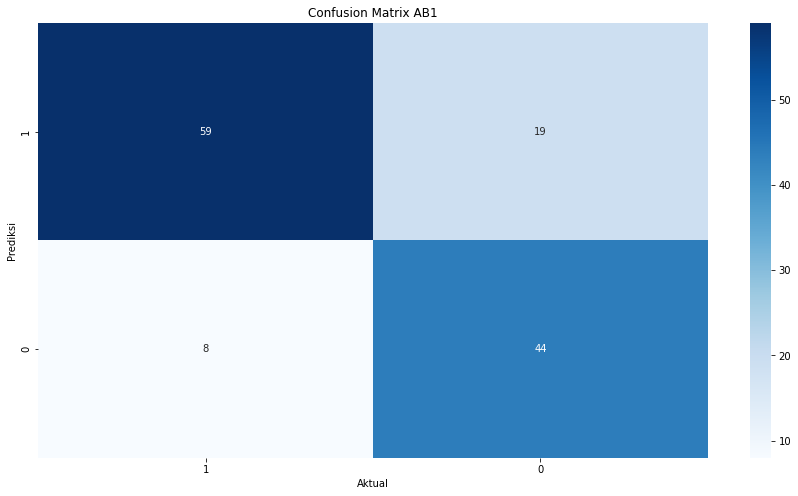

In [ ]:
cf_matrix = metrics.confusion_matrix(y_train3, ab3_val, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix AB1') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

Prediksi dengan data test

In [ ]:
ab3_prediksi = ab3_model.predict(X_test3)
print("Accuracy : ", metrics.accuracy_score(y_test3, ab3_prediksi))
print("Precision: ", metrics.precision_score(y_test3, ab3_prediksi))
print("Recall   : ", metrics.recall_score(y_test3, ab3_prediksi))
print("F1 Score : ", metrics.f1_score(y_test3, ab3_prediksi))

Accuracy :  0.7368421052631579
Precision:  0.7272727272727273
Recall   :  0.8
F1 Score :  0.761904761904762


Visualisasi Confusion Matrix

[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

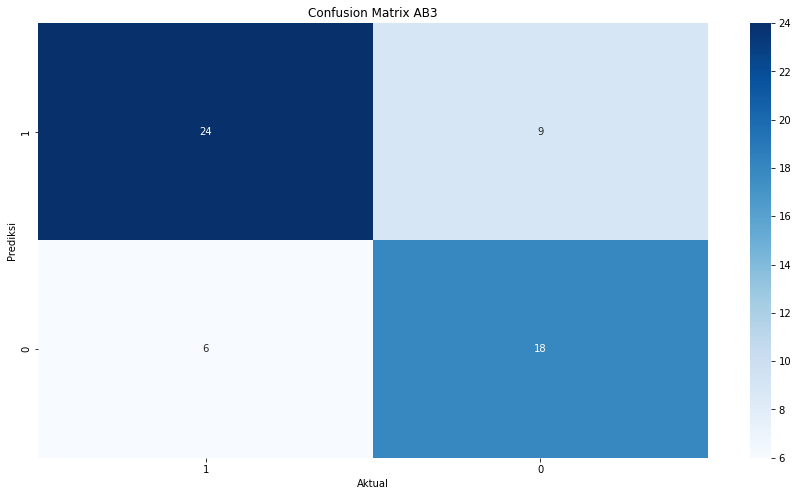

In [ ]:
cf_matrix = metrics.confusion_matrix(y_test3, ab3_prediksi, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix AB3') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

## Export

### Data Test

Label data test dengan hasil prediksi pada masing-masing model

In [ ]:
test_microarray_prediksi = y_test1.to_frame()
test_microarray_prediksi['AB1'] = ab1_prediksi.astype('int')
test_microarray_prediksi['AB2'] = ab2_prediksi.astype('int')
test_microarray_prediksi['AB3'] = ab3_prediksi.astype('int')
test_microarray_prediksi

,Label,AB1,AB2,AB3
0,0,1,1,1
1,1,1,1,1
2,1,1,0,1
3,1,1,1,1
4,0,1,0,1
5,0,0,0,0
6,1,1,1,1
7,1,1,1,1
8,1,1,1,1
9,1,1,1,0


Export ke CSV

In [ ]:
test_microarray_prediksi.to_csv(r'test_microarray_prediksi_ab.csv', index=False, header=True)

### Suspect

Fit model

In [ ]:
ab1_model.fit(X_train1, y_train1)
ab2_model.fit(X_train2, y_train2)
ab3_model.fit(X_train3, y_train3)

AdaBoostClassifier(learning_rate=0.01)

Prediksi dengan Suspect

In [ ]:
ab1_prediksi_suspect = ab1_model.predict(df_suspect1).astype('int')
ab2_prediksi_suspect = ab2_model.predict(df_suspect2).astype('int')
ab3_prediksi_suspect = ab3_model.predict(df_suspect3).astype('int')

Melihat hasil prediksi masing-masing model

In [ ]:
calon_dataframe = {'AB1' : ab1_prediksi_suspect,
                   'AB2' : ab2_prediksi_suspect,
                   'AB3' : ab3_prediksi_suspect}
suspect_prediksi = pd.DataFrame(calon_dataframe)
suspect_prediksi

,AB1,AB2,AB3
0,0,0,0
1,1,1,1
2,1,0,0
3,1,1,1
4,0,0,0


Export ke CSV

In [ ]:
suspect_prediksi.to_csv(r'suspect_prediksi_ab.csv', index=False, header=True)